In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df = pd.read_csv("zomato.csv",encoding='ISO-8859-1')

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.keys()

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

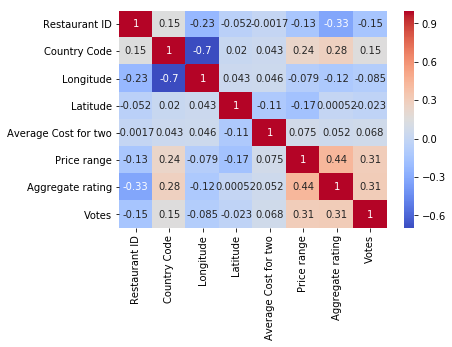

In [6]:
sns.heatmap(data=df.corr(),cmap='coolwarm',annot=True)

In [7]:
df['Currency'].value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Emirati Diram(AED)          60
Brazilian Real(R$)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

In [8]:
df['Has Online delivery'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [9]:
df['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [10]:
df['Is delivering now'].value_counts()

No     9517
Yes      34
Name: Is delivering now, dtype: int64

In [11]:
df['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

In [12]:
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [13]:
df['Rating color'].value_counts()

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

In [14]:
df['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

(1, 5)

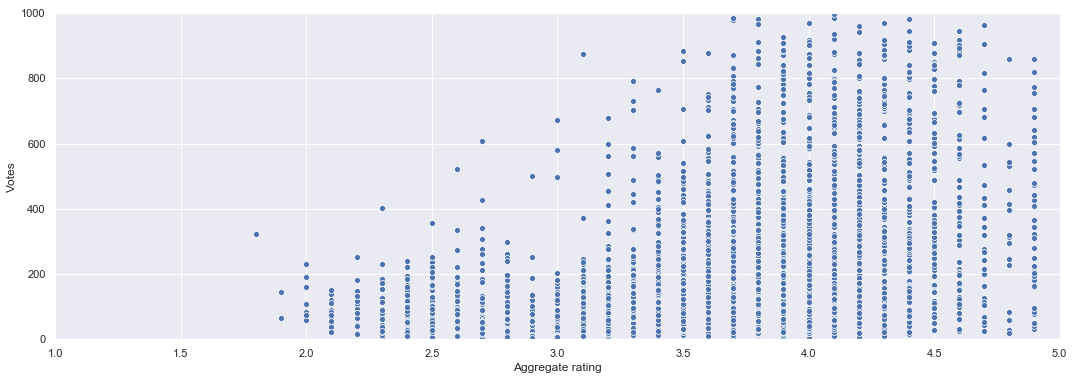

In [15]:
sns.set(rc={'figure.figsize':(18,6)})
sns.scatterplot(data=df,x='Aggregate rating',y='Votes')
plt.ylim(0,1000)
plt.xlim(1,5)

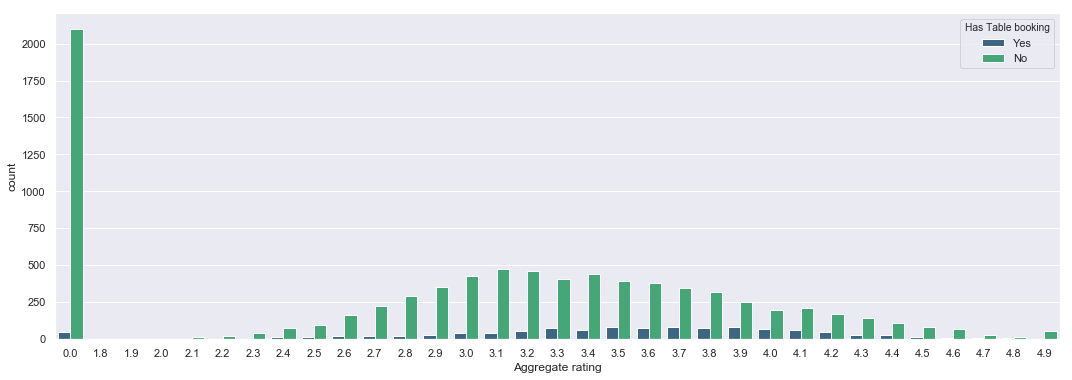

In [16]:
sns.countplot(data=df,x='Aggregate rating',hue='Has Table booking',palette='viridis')

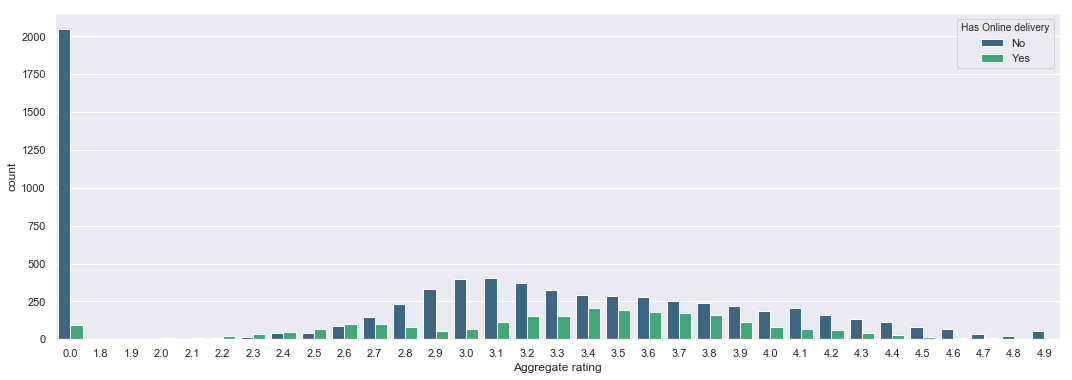

In [17]:
sns.countplot(data=df,x='Aggregate rating',hue='Has Online delivery',palette='viridis')

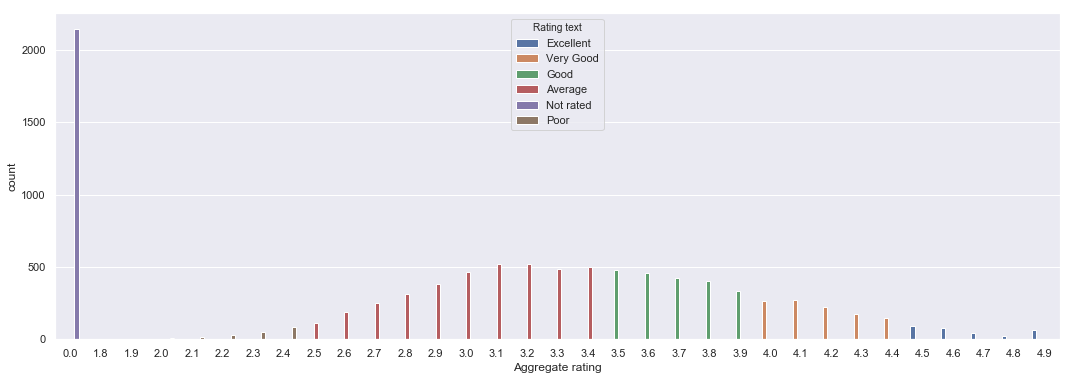

In [18]:
sns.countplot(data=df,x='Aggregate rating',hue='Rating text')

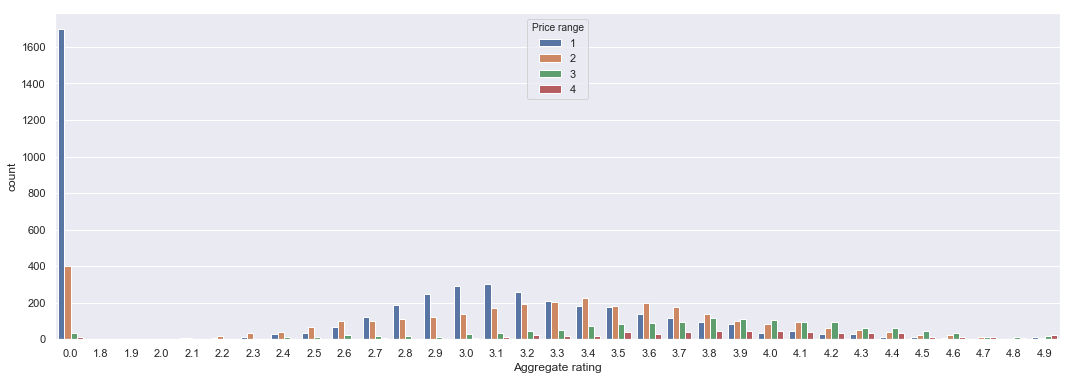

In [19]:
sns.countplot(data=df,x='Aggregate rating',hue='Price range')

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer

In [21]:
mlb = MultiLabelBinarizer()

In [22]:
 new_cuisine=pd.DataFrame(mlb.fit_transform(df['Cuisines'].astype(str)))

In [23]:
 restaurant_name=pd.DataFrame(mlb.fit_transform(df['Restaurant Name'].astype(str)))

In [24]:
new_city=pd.DataFrame(mlb.fit_transform(df['City'].astype(str)))

In [25]:
new_address=pd.DataFrame(mlb.fit_transform(df['Address'].astype(str)))

In [26]:
new_locality=pd.DataFrame(mlb.fit_transform(df['Locality'].astype(str)))

In [27]:
locality_verbose=pd.DataFrame(mlb.fit_transform(df['Locality Verbose'].astype(str)))

In [28]:
df['new cost'] = 0

In [29]:
d = {'Botswana Pula(P)':0.095, 'Brazilian Real(R$)':0.266,'Dollar($)':1,'Emirati Diram(AED)':0.272,
    'Indian Rupees(Rs.)':0.014,'Indonesian Rupiah(IDR)':0.00007,'NewZealand($)':0.688,'Pounds(\x8c£)':1.314,
    'Qatari Rial(QR)':0.274,'Rand(R)':0.072,'Sri Lankan Rupee(LKR)':0.0055,'Turkish Lira(TL)':0.188}

df['new cost'] = df['Average Cost for two'] * df['Currency'].map(d)

In [30]:
df['cuisine'] = 0

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca=PCA()

In [33]:
cuisine = pca.fit_transform(new_cuisine)
pca = PCA(n_components=1)  
cuisine = pca.fit_transform(cuisine)
df['cuisine']=cuisine

In [34]:
restaurant = pca.fit_transform(restaurant_name)
pca = PCA(n_components=1)  
restaurant = pca.fit_transform(restaurant)
df['restaurant']=restaurant

In [35]:
city = pca.fit_transform(new_city)
pca = PCA(n_components=1)  
city = pca.fit_transform(city)
df['city']=city

In [36]:
address = pca.fit_transform(new_address)
pca = PCA(n_components=1)  
address = pca.fit_transform(address)
df['address']=address

In [37]:
locality = pca.fit_transform(new_locality)
pca = PCA(n_components=1)  
locality = pca.fit_transform(locality)
df['locality']=locality

In [38]:
locality_verbose = pca.fit_transform(locality_verbose)
pca = PCA(n_components=1)  
locality_verbose = pca.fit_transform(locality_verbose)
df['locality_verbose']=locality_verbose

In [39]:
cuisine.shape

(9551, 1)

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


In [41]:
df['Has Table booking'] = labelencoder.fit_transform(df['Has Table booking'])

In [42]:
df['Has Online delivery'] = labelencoder.fit_transform(df['Has Online delivery'])

In [43]:
df['Is delivering now'] = labelencoder.fit_transform(df['Is delivering now'])

In [44]:
df['Rating text']= labelencoder.fit_transform(df['Rating text'])

In [45]:
df['City'] = labelencoder.fit_transform(df['City'])

In [46]:
df['Rating color'] = labelencoder.fit_transform(df['Rating color'])

In [47]:
df['Switch to order menu'] = labelencoder.fit_transform(df['Switch to order menu'])

In [48]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Rating color,Rating text,Votes,new cost,cuisine,restaurant,city,address,locality,locality_verbose
0,6317637,Le Petit Souffle,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,0,1,314,104.5,0.705835,-0.002379,0.936396,0.615999,0.305662,1.031834
1,6304287,Izakaya Kikufuji,162,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,0,1,591,114.0,1.787682,-0.898040,0.936396,0.390457,-0.218010,0.527627
2,6300002,Heat - Edsa Shangri-La,162,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,1,5,270,380.0,0.014785,1.142627,1.503840,0.801705,-0.377290,0.995238
3,6318506,Ooma,162,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,0,1,365,142.5,0.610066,-1.614710,1.503840,0.662548,0.068882,1.237404
4,6314302,Sambo Kojin,162,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,0,1,229,142.5,0.877396,-0.620551,1.503840,0.679050,0.068882,1.237404


In [50]:
df.rename(columns = {"Aggregate rating":"Aggregate_rating", 
                    "Price range":"Price_range",
                    "Rating color":"Rating_color",
                      "Restaurant ID":"Restaurant_id",
                      "new cost":"new_cost"}, 
                                 inplace = True)

In [51]:
corr=df.corr('pearson')
abs(corr['Aggregate_rating']).sort_values(ascending=False)

Aggregate_rating        1.000000
Price_range             0.437944
Rating_color            0.367054
Restaurant_id           0.326212
Votes                   0.313691
new_cost                0.289929
Country Code            0.282189
Has Online delivery     0.225699
Has Table booking       0.189998
Rating text             0.182662
city                    0.144101
City                    0.132163
Longitude               0.116818
address                 0.113869
locality_verbose        0.073368
locality                0.070686
Average Cost for two    0.051792
restaurant              0.045376
Is delivering now       0.019180
cuisine                 0.007479
Latitude                0.000516
Switch to order menu         NaN
Name: Aggregate_rating, dtype: float64

In [52]:
x1=np.array(df["Price_range"])
x2=np.array(df["Rating_color"])
x3=np.array(df["Restaurant_id"])
x4=np.array(df["Votes"])
x5=np.array(df["new_cost"])
y=np.array(df["Aggregate_rating"])

In [53]:
x1=(x1-x1.min())/(x1.max()-x1.min())
x2=(x2-x2.min())/(x2.max()-x2.min())
x3=(x3-x3.min())/(x3.max()-x3.min())
x4=(x4-x4.min())/(x4.max()-x4.min())
x5=(x5-x5.min())/(x5.max()-x5.min())
y=(y-y.min())/(y.max()-y.min())

In [57]:
X1_train,X1_test,X2_train,X2_test,X3_train,X3_test,X4_train,X4_test,X5_train,X5_test,Y_train,Y_test=train_test_split(x1,x2,x3,x4,x5,y,test_size=0.3)

In [58]:
def hypothesis(a,b,c,d,f,g,x1,x2,x3,x4,x5):
    return a*x1+b*x2+c*x3+d*x4+f*x5+g

In [59]:
def error(a,b,c,d,f,g,x1,x2,x3,x4,x5,y):
    e = 0
    m = len(x1)
    for i in range(m):
        e += np.power((hypothesis(a,b,c,d,f,g,x1[i],x2[i],x3[i],x4[i],x5[i])-y[i]), 2)
    
    return (1/(2*m))*e 

In [60]:
def step_gradient(a,b,c,d,f,g,x1,x2,x3,x4,x5,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    grad_d = 0
    grad_f = 0
    grad_g = 0
    m = len(x1)
    for i in range(m):
        grad_a += 2/m * (hypothesis(a,b,c,d,f,g,x1[i],x2[i],x3[i],x4[i],x5[i]) - y[i]) * x1[i]
        grad_b += 2/m * (hypothesis(a,b,c,d,f,g,x1[i],x2[i],x3[i],x4[i],x5[i]) - y[i]) * x2[i]
        grad_c += 2/m * (hypothesis(a,b,c,d,f,g,x1[i],x2[i],x3[i],x4[i],x5[i]) - y[i]) * x3[i]
        grad_d += 2/m * (hypothesis(a,b,c,d,f,g,x1[i],x2[i],x3[i],x4[i],x5[i]) - y[i]) * x4[i]
        grad_f += 2/m * (hypothesis(a,b,c,d,f,g,x1[i],x2[i],x3[i],x4[i],x5[i]) - y[i]) * x5[i]
        grad_g += 2/m * (hypothesis(a,b,c,d,f,g,x1[i],x2[i],x3[i],x4[i],x5[i]) - y[i])
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    d = d - (grad_d * learning_rate)
    f = f - (grad_f * learning_rate)
    g = g - (grad_g * learning_rate)
    
    return a, b, c, d, f, g

In [61]:
def descend(initial_a, initial_b, initial_c, intial_d, intial_f, intial_g, x1, x2, x3, x4, x5, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    c = initial_c
    d = intial_d
    f = intial_f
    g = intial_g
    for i in range(iterations):
        e = error(a, b, c, d, f, g, x1, x2, x3, x4, x5, y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}, c: {c}, d:{d}, f:{f}, g:{g}")
        
        a, b, c, d, f, g = step_gradient(a, b, c, d, f, g, x1, x2, x3, x4, x5, y, learning_rate)

    return a, b, c, d, f, g

In [62]:
a = 0.32751537609004366
b = -0.2799943140260571
c = -0.15443361250460716
d = 0.7102617946228625
f = 0.20345733790225556
g = 0.6832011613301563
learning_rate = 0.05
iterations = 10000

In [63]:
final_a,final_b,final_c,final_d,final_f,final_g=descend(a,b,c,d,f,g,X1_train,X2_train,X3_train,X4_train,X5_train,Y_train,learning_rate,iterations)

Error: 0.030730198458095923, a: 0.32751537609004366, b: -0.2799943140260571, c: -0.15443361250460716, d:0.7102617946228625, f:0.20345733790225556, g:0.6832011613301563
Error: 0.030710265533392633, a: 0.3317988790466457, b: -0.27254235631475515, c: -0.15112116321607102, d:0.7450646683790634, f:0.2213663369781323, g:0.6749693650674963
Error: 0.030698544678395955, a: 0.32965531547748905, b: -0.2719209170833501, c: -0.15095852522997102, d:0.7750883777992904, f:0.23760027205387574, g:0.6743361761444253
Error: 0.030689527748445054, a: 0.3277149690320592, b: -0.27141125957083145, c: -0.15082719208455778, d:0.8009789698224801, f:0.2526260410429882, g:0.6738153643311163
Error: 0.030682564748943528, a: 0.3259795368029737, b: -0.2709654864555511, c: -0.150718681225142, d:0.8233058341380769, f:0.26653349702982876, g:0.6733621421804293
Error: 0.030677166231443856, a: 0.32442560586300373, b: -0.27057512183950877, c: -0.15062947144938524, d:0.84256001313031, f:0.2794047384418624, g:0.6729673740912664

In [64]:
np.sqrt(error(final_a,final_b,final_c,final_d,final_f,final_g,X1_train,X2_train,X3_train,X4_train,X5_train,Y_train))

0.17510978562966364

In [65]:
np.sqrt(error(final_a,final_b,final_c,final_d,final_f,final_g,X1_test,X2_test,X3_test,X4_test,X5_test,Y_test))

0.17520110547392334

In [66]:
new_df = df[['Price_range','Rating_color','Votes','new_cost','Aggregate_rating']]


In [67]:
new_df = pd.get_dummies(new_df, columns=['Rating_color'])

In [416]:
# new_df.head()

In [417]:
# feature=pd.concat([df['Price range'],df['Votes'],df['new cost']],axis=1)

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [69]:
X = new_df.drop(['Aggregate_rating'], axis=1)
y = new_df['Aggregate_rating']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
regressor = LinearRegression()

In [74]:
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
Y_pred=regressor.predict(X_test)

In [76]:
for i in zip(Y_pred,Y_test):
    print(i)

(4.167897534920751, 4.3)
(4.618504615668185, 4.6)
(3.075637398607955, 3.3)
(3.673912628928947, 3.6)
(4.156466194693933, 4.0)
(-0.0053175802224161295, 0.0)
(3.0439037643604965, 3.4)
(2.296944091650788, 2.0)
(2.2924583816272657, 2.4)
(3.0579573310254986, 3.3)
(4.65002848400575, 4.5)
(0.012884193842526592, 0.0)
(3.04145376824421, 3.0)
(3.084951558810051, 2.7)
(-0.0043222333194989915, 0.0)
(3.0592146269550673, 2.8)
(3.041191819217559, 3.3)
(4.156319774032091, 4.1)
(2.2880556543029607, 2.3)
(4.18973170962651, 4.0)
(3.0397118740401314, 3.0)
(3.673960694991003, 3.8)
(3.674185535809678, 3.6)
(2.293868493530372, 2.3)
(3.746577322468405, 3.9)
(3.7020244860944254, 3.9)
(3.042040924859386, 2.8)
(-0.004691123828447719, 0.0)
(3.680330157338062, 3.6)
(-0.003363994624558053, 0.0)
(3.6569027006608836, 3.7)
(3.0406701127350724, 3.0)
(3.0419274086646406, 2.7)
(3.6557457715011648, 3.5)
(3.6725090917382888, 3.5)
(3.06114644534066, 3.4)
(4.196753933615925, 4.0)
(3.099418404798371, 3.4)
(4.200081594002961, 4

(3.714607579759209, 3.9)
(4.159517834031268, 4.3)
(3.0396747658321552, 2.9)
(3.690796863558244, 3.7)
(2.297064182557981, 2.3)
(-0.004359341527475191, 0.0)
(3.0412987606998567, 3.2)
(3.0581734055609098, 3.1)
(4.166581542971694, 4.2)
(3.039971631495967, 3.3)
(-0.00395334281054982, 0.0)
(3.0569183012021575, 3.2)
(3.0605461393005884, 3.4)
(0.01317886793552292, 0.0)
(3.7055619496948102, 3.6)
(4.1660792327299045, 4.4)
(3.0599174913358045, 3.4)
(-0.004691123828447719, 0.0)
(3.060578864366933, 3.3)
(3.672849640322525, 3.7)
(4.203958906692234, 4.2)
(3.062879573261475, 3.4)
(3.042719830457042, 3.4)
(3.6587515363472596, 3.6)
(-0.004027559226503108, 0.0)
(-0.004691123828447719, 0.0)
(-0.00395334281054982, 0.0)
(3.0417091425584135, 3.3)
(0.014617321763341629, 0.0)
(3.0419296002354566, 3.4)
(0.012626627957507353, 0.0)
(3.6733647720925635, 3.7)
(4.25080362954844, 4.3)
(3.0591753271762747, 3.1)
(3.0605505224422203, 2.5)
(3.67443652698225, 3.5)
(3.059319376866549, 2.6)
(3.6997106277749885, 3.5)
(3.7265

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
mean_squared_error(Y_test,Y_pred)

0.03259584543451575

In [79]:
np.sqrt(mean_squared_error(Y_test,Y_pred))

0.1805431954810697

In [80]:
r2_score(Y_test,Y_pred)

0.9859636709929556